<a href="https://colab.research.google.com/github/maddheshiya937/Learner-Segmentation-for-Recommendation-System/blob/main/Mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat Dec  3 09:53:14 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0    29W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import random
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification



In [ ]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from keras.layers import Conv2D, BatchNormalization,Dropout, Flatten,Dense,MaxPooling2D
from keras.optimizers import Adam,RMSprop,SGD,Adamax
from keras import regularizers
from keras.utils import load_img




In [ ]:
pic_size = 128

In [ ]:
base_path='/content/drive/MyDrive/database-OLSFED/train'


In [ ]:
catagories=os.listdir(base_path)
catagories

['DI', 'HA', 'TR', 'CO', 'NE']

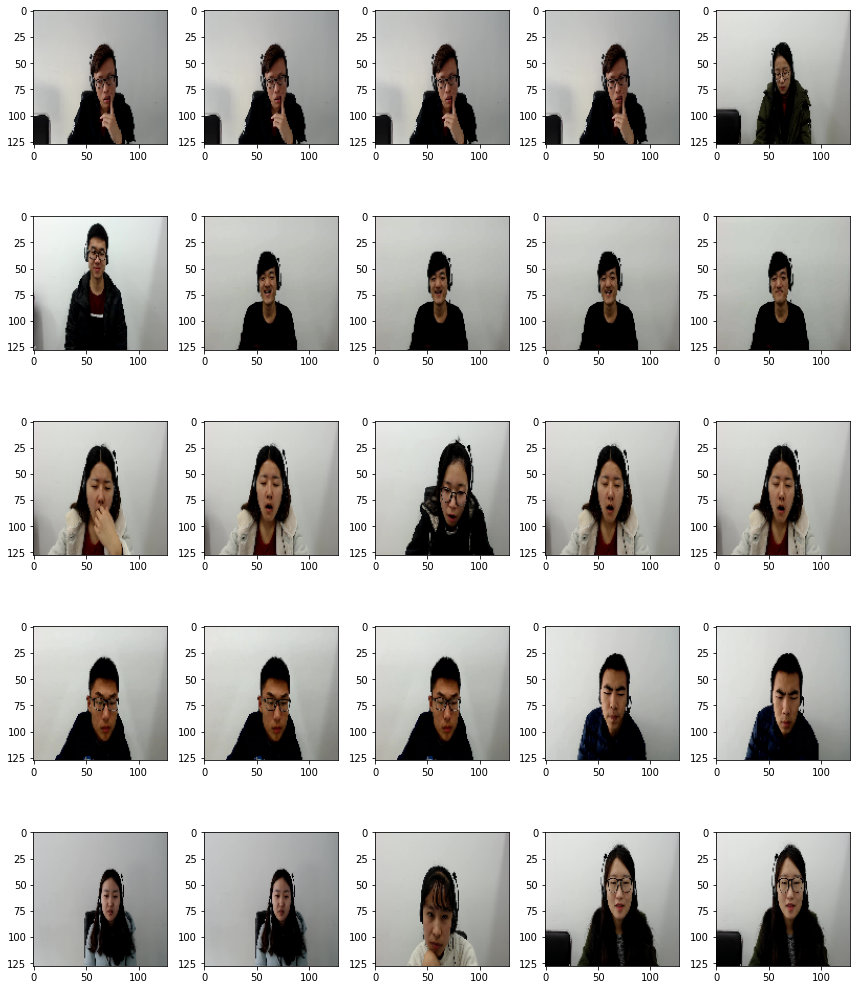

In [ ]:
plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path+"/"+expression+"/"+os.listdir(base_path+"/"+expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [ ]:
image_count=[]
emotions=[]
total_images=0

for expression in os.listdir(base_path):
    emotions.append(expression)
    image_count.append(len(os.listdir(base_path +"/"+expression)))
    total_images+=len(os.listdir(base_path +"/"+expression))
    print(str(len(os.listdir(base_path +"/"+expression))) + " " + expression + " images")
print("Total no of image in this data set:",total_images)

4652 DI images
5020 HA images
4772 TR images
4763 CO images
6928 NE images
Total no of image in this data set: 26135


In [ ]:
image_count
emotions

['DI', 'HA', 'TR', 'CO', 'NE']

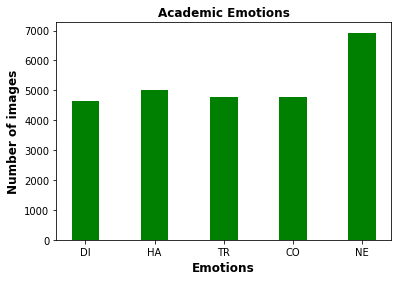

In [ ]:
plt.xlabel("Emotions",fontname="Times New Roman", size=12,fontweight="bold")
plt.ylabel("Number of images",fontname="Times New Roman", size=12,fontweight="bold")
plt.title("Academic Emotions",fontname="Times New Roman", size=12,fontweight="bold")
plt.bar(emotions, image_count, color ='green',width = 0.4)
plt.show()

In [ ]:
img_data_list=[]
for dataset in catagories:
    count=0
    img_list=os.listdir(base_path+'/'+dataset)
    img_list=img_list[0:1000]
    print('Load the imgages of dataset-'+'{}:{}\n'.format(dataset,len(img_list)))
    for img in img_list:
        if count==1000:
            break
        count=count+1
        input_img=cv2.imread(base_path+'/'+dataset+'/'+img)
        input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(pic_size,pic_size))
        img_data_list.append(input_img_resize)
img_data=np.array(img_data_list)
img_data=img_data.astype('float32')
img_data=img_data/255
img_data.shape

Load the imgages of dataset-DI:1000

Load the imgages of dataset-HA:1000

Load the imgages of dataset-TR:1000

Load the imgages of dataset-CO:1000

Load the imgages of dataset-NE:1000



(5000, 128, 128)

(128, 128)

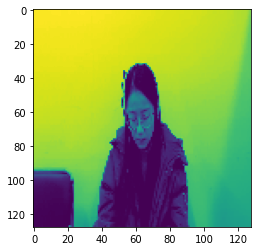

In [ ]:
plt.imshow(img_data[0])
img_data[0].shape

In [ ]:
num_classes = 5

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:999]=0 
labels[1000:1999]=1 
labels[2000:2999]=2 
labels[3000:3999]=3 
labels[4000:4999]=4 

names=['Disturb','Happy','Tired','Confuse','Natural']

def getLabel(id):
    return ['Disturb','Happy','Tired','Confuse','Natural'][id]

In [ ]:
from keras.utils import to_categorical

In [ ]:
Y = to_categorical(labels, 5)

In [ ]:
len(Y)

5000

In [ ]:
#spliting the data test into training and testing data set
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(img_data,Y,test_size=0.2,random_state=0)

In [ ]:
y_train[0]

array([0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
print(Y)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]]


In [ ]:
model = Sequential()

# 1 - Convolution
model.add(Conv2D(512,kernel_size=(3,3), padding='same',activation = 'relu',input_shape=(pic_size, pic_size,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.45))

# 2nd Convolution layer
model.add(Conv2D(256,kernel_size=(3,3),activation = 'relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.45))

# 3rd Convolution layer
model.add(Conv2D(256,kernel_size=(3,3),activation = 'relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.45))

# 4th Convolution layer
model.add(Conv2D(128,kernel_size=(3,3),activation = 'relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.45))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(5, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 512)     5120      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 512)    2048      
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 512)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 256)       1179904   
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 256)      1024      
 hNormalization)                                                 
                                                        

In [ ]:
model_1 = Sequential()

# 1 - Convolution
model_1.add(Conv2D(512,kernel_size=(3,3), padding='same',activation = 'relu',input_shape=(pic_size, pic_size,1)))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.45))

# 2nd Convolution layer
model_1.add(Conv2D(256,kernel_size=(3,3),activation = 'relu',padding='same'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.45))

# 3rd Convolution layer
model_1.add(Conv2D(256,kernel_size=(3,3),activation = 'relu', padding='same'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.45))

# 4th Convolution layer
model_1.add(Conv2D(128,kernel_size=(3,3),activation = 'relu',padding='same'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.45))

# Flattening
model_1.add(Flatten())

# Fully connected layer 1st layer
model_1.add(Dense(256,activation = 'relu'))
model_1.add(BatchNormalization())
# model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model_1.add(Dense(256,activation = 'relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.25))

model_1.add(Dense(5, activation='softmax'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 512)     5120      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 512)    2048      
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 512)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 256)       1179904   
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 256)      1024      
 hNormalization)                                                 
                                                        

In [ ]:
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
opt = Adam(lr=0.001)
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train, batch_size=8,epochs=20, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
500/500 [==============================] - 39s 78ms/step - loss: 0.9083 - accuracy: 0.6612 - val_loss: 0.9276 - val_accuracy: 0.7460
Epoch 2/20
500/500 [==============================] - 39s 78ms/step - loss: 0.4595 - accuracy: 0.8382 - val_loss: 1.5407 - val_accuracy: 0.7230
Epoch 3/20
500/500 [==============================] - 37s 75ms/step - loss: 0.3055 - accuracy: 0.8925 - val_loss: 0.5284 - val_accuracy: 0.8230
Epoch 4/20
500/500 [==============================] - 37s 75ms/step - loss: 0.2442 - accuracy: 0.9128 - val_loss: 0.2347 - val_accuracy: 0.9390
Epoch 5/20
500/500 [==============================] - 38s 75ms/step - loss: 0.1888 - accuracy: 0.9392 - val_loss: 1.0912 - val_accuracy: 0.8510
Epoch 6/20
500/500 [==============================] - 40s 80ms/step - loss: 0.2044 - accuracy: 0.9340 - val_loss: 30.9097 - val_accuracy: 0.1940
Epoch 7/20
500/500 [==============================] - 40s 80ms/step - loss: 0.2297 - accuracy: 0.9227 - val_loss: 0.1585 - val_accuracy

In [ ]:
hist_1 = model_1.fit(X_train, y_train, batch_size=8,epochs=15, verbose=1, validation_data=(X_test, y_test))

Epoch 1/15
500/500 [==============================] - 41s 81ms/step - loss: 1.3564 - accuracy: 0.4950 - val_loss: 3.0022 - val_accuracy: 0.2320
Epoch 2/15
500/500 [==============================] - 39s 79ms/step - loss: 0.6392 - accuracy: 0.7707 - val_loss: 0.4763 - val_accuracy: 0.8170
Epoch 3/15
500/500 [==============================] - 41s 83ms/step - loss: 0.3793 - accuracy: 0.8622 - val_loss: 0.1844 - val_accuracy: 0.9310
Epoch 4/15
500/500 [==============================] - 41s 83ms/step - loss: 0.2825 - accuracy: 0.9022 - val_loss: 0.3966 - val_accuracy: 0.8860
Epoch 5/15
500/500 [==============================] - 40s 79ms/step - loss: 0.2045 - accuracy: 0.9323 - val_loss: 0.3664 - val_accuracy: 0.8830
Epoch 6/15
500/500 [==============================] - 40s 79ms/step - loss: 0.1808 - accuracy: 0.9398 - val_loss: 0.3859 - val_accuracy: 0.9210
Epoch 7/15
500/500 [==============================] - 40s 79ms/step - loss: 0.1348 - accuracy: 0.9557 - val_loss: 37.9523 - val_accuracy

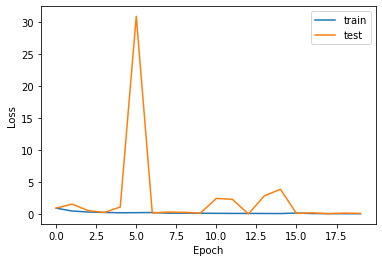

In [ ]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

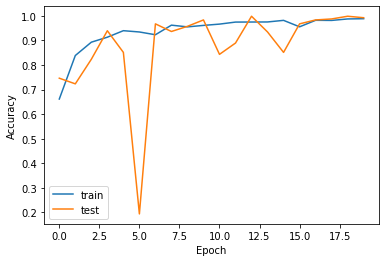

In [ ]:
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='test')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

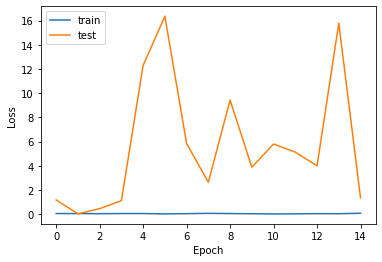

In [ ]:
plt.plot(hist_1.history['loss'], label='train')
plt.plot(hist_1.history['val_loss'], label='test')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

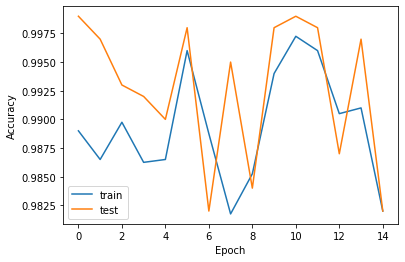

In [ ]:
plt.plot(hist_1.history['accuracy'], label='train')
plt.plot(hist_1.history['val_accuracy'], label='test')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model.save("six_model.h5")

In [ ]:
y_pred=model_1.predict(X_test)

32/32 [==============================] - 2s 75ms/step


In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [ ]:
CLASS_LABELS  = ['Disturb','Happy','Tired','Confuse','Natural']

cm_data = plot_confusion_matrix(model_1,np.argmax(y_test, axis = 1), y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (15,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

ValueError: ignored

In [ ]:
img_size=cv2.imread("/content/drive/MyDrive/database-OLSFED/test/CO/CO0.jpg")

In [ ]:
input_img = cv2.cvtColor(img_size, cv2.COLOR_BGR2GRAY)
resized=cv2.resize(input_img,(128,128),interpolation=cv2.INTER_AREA)
resized = resized.astype('float32') / 255
newimg=np.array(resized).reshape(-1,128,128)

In [ ]:
res=model.predict(newimg)

1/1 [==============================] - 0s 153ms/step


In [ ]:
result=np.argmax(res)
print(result)
if result==0 or result==2:
   print("Not Engage")
else:
  print("Engage")

0
Not Engage


In [ ]:
from keras.models import load_model

In [ ]:
new_model =keras.models.load_model('/content/drive/MyDrive/database-OLSFED/focus/final_model.h5')

In [ ]:
img=cv2.imread('/content/drive/MyDrive/database-OLSFED/focus/my_image.jpeg')


In [ ]:
img_size.shape

(720, 1280, 3)

In [ ]:
# plt.imshow(img_size)

In [ ]:
# input_img = cv2.cvtColor(img_size, cv2.COLOR_BGR2GRAY)
# plt.imshow(input_img)

In [ ]:
resized=cv2.resize(input_img,(128,128),interpolation=cv2.INTER_AREA)

In [ ]:
resized = resized.astype('float32') / 255

In [ ]:
newimg=np.array(resized).reshape(-1,128,128)

In [ ]:
newimg.shape

(1, 128, 128)

In [ ]:
res=new_model.predict(newimg)

1/1 [==============================] - 0s 18ms/step


In [ ]:
res

array([[9.9371052e-01, 5.3386251e-09, 3.0481306e-08, 4.6479822e-06,
        6.2848139e-03]], dtype=float32)

In [ ]:
result=np.argmax(res)
print(result)
if result==0 or result==2:
   print("Not Engage")
else:
  print("Engage")

0
Not Engage


In [ ]:
print("predicted image is :",getLabel(np.argmax(res)))

predicted image is : Disturb


In [ ]:
#2nd_model


In [ ]:
modelf = Sequential()

# 1 - Convolution
modelf.add(Conv2D(512,kernel_size=(3,3), padding='same',activation = 'relu',input_shape=(64, 64,1)))
modelf.add(BatchNormalization())
modelf.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.45))

# 2nd Convolution layer
modelf.add(Conv2D(256,kernel_size=(3,3),activation = 'relu',padding='same'))
modelf.add(BatchNormalization())
modelf.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.45))

# 3rd Convolution layer
modelf.add(Conv2D(256,kernel_size=(3,3),activation = 'relu', padding='same'))
modelf.add(BatchNormalization())
modelf.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.45))

# 4th Convolution layer
modelf.add(Conv2D(128,kernel_size=(3,3),activation = 'relu',padding='same'))
modelf.add(BatchNormalization())
modelf.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.45))

# Flattening
modelf.add(Flatten())

# Fully connected layer 1st layer
modelf.add(Dense(256,activation = 'relu'))
modelf.add(BatchNormalization())
# model.add(Dropout(0.25))

# Fully connected layer 2nd layer
modelf.add(Dense(256,activation = 'relu'))
modelf.add(BatchNormalization())
modelf.add(Dropout(0.25))

modelf.add(Dense(5, activation='softmax'))

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/database-OLSFED/focus/Comparison_Table.csv")

In [ ]:
df

,Epoch,LR,BatchSize,Input,Conv2D,Dense,Train_Accuracy,Test_Accuracy
0,20,0.001,8,128*128,4,3,98,99
1,10,0.001,16,128*128,4,3,97,79
2,15,0.001,8,128*128,4,3,96,95
3,15,0.001,8,256*256,4,3,92,92
4,20,0.001,4,128*128,4,3,88,96
